In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
base = "CME"

In [3]:
if base == "CME":
    sec = "Dino"
if base == "Dino":
    sec = "CME"

Comparison = pd.read_csv(f"{base} Base Output/Comparison.csv")
Coverage = pd.read_csv(f"{base} Base Output/ID_Coverage.csv")

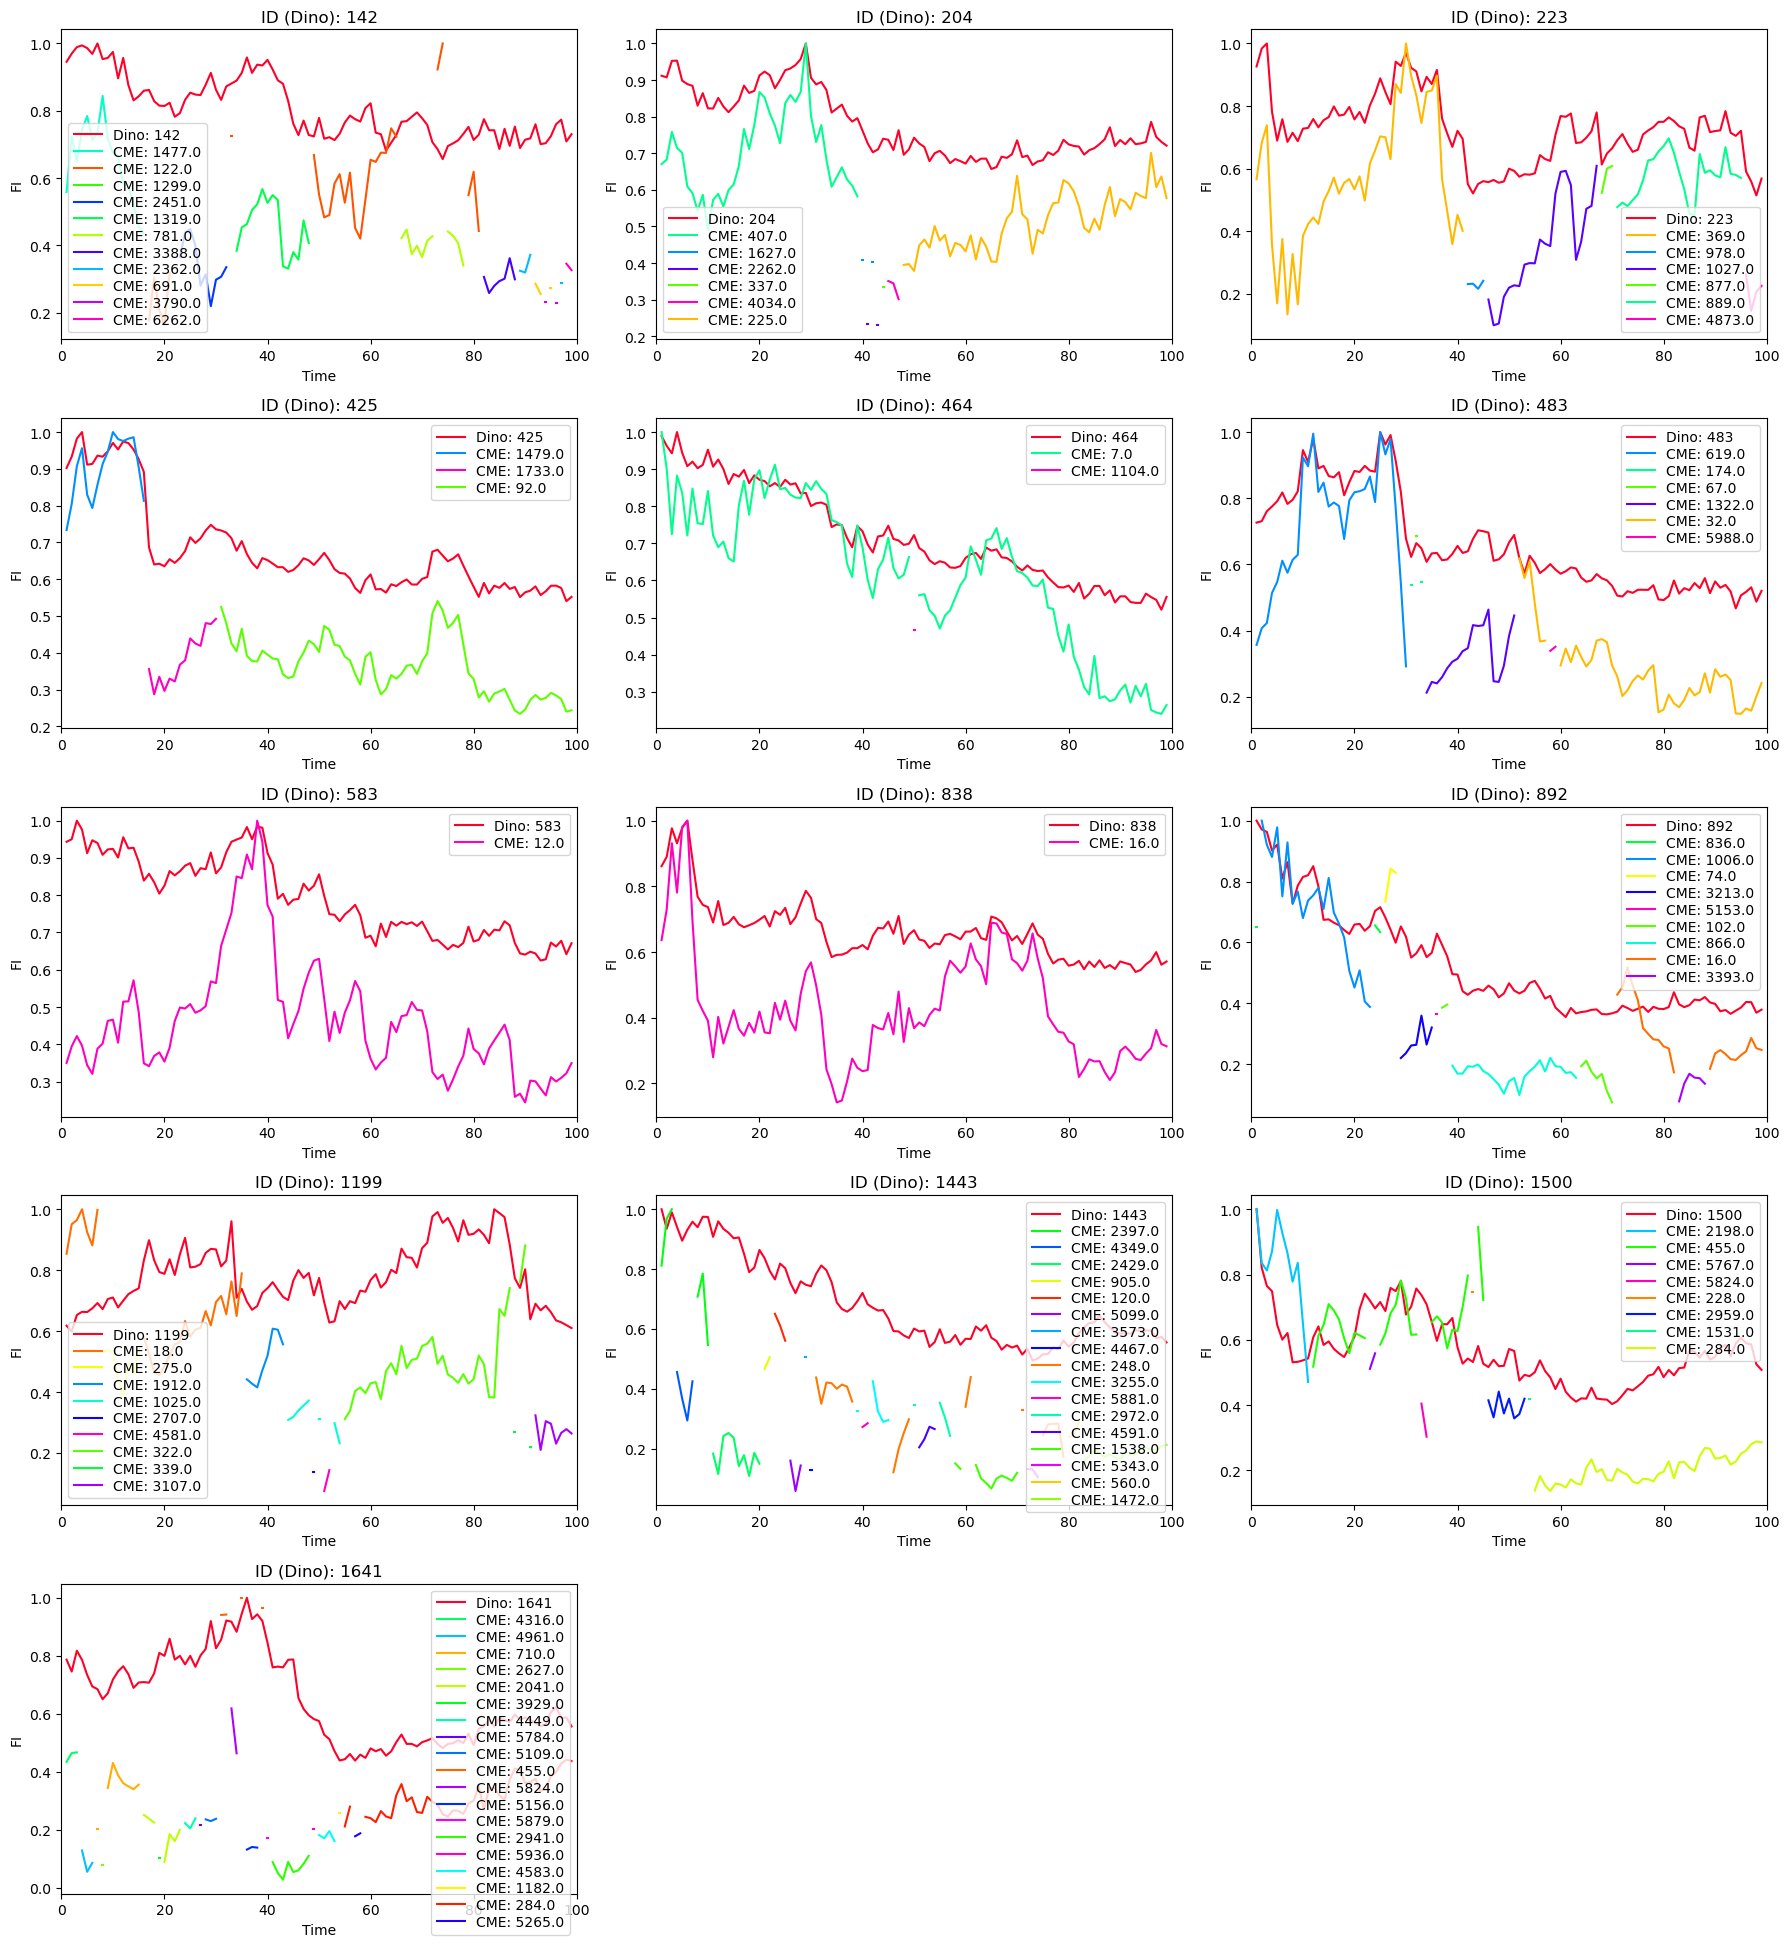

In [4]:
def FI(ID):
    ID_comp = Comparison[Comparison[f"ID ({base})"] == ID]
    ID_cov = Coverage[Coverage[f"ID ({base})"] == ID]
    comp = ID_comp.to_numpy()
    cov = ID_cov.to_numpy()
    data = cov[0][4]
    y_data = np.array([row.split(',') for row in data.split(';')], float)
    FI_y = np.zeros((len(y_data)),dtype=object)
    t_y = np.zeros((len(y_data)),dtype=object)
    for i, rows in enumerate(y_data[:-1]):
        FI_y[i] = comp[int(y_data[i][1]-1):int(y_data[i+1][1]-1),12]
        t_y[i] = comp[int(y_data[i][1]-1):int(y_data[i+1][1]-1),8]
    FI_y[-1] = comp[int(y_data[-1][1]-1):,12]
    t_y[-1] = comp[int(y_data[-1][1]-1):,8]
    ID_y = y_data[:,0]
    FI_x = comp[:,11]
    t_full = comp[:,8]
    return t_full, FI_x, t_y, ID_y, FI_y

def FI_plot(ID_array):
    ids = np.atleast_1d(ID_array)
    n = len(ids)
    if n in [3, 4]:
        rows, cols = 2, 2
    else:
        cols = min(n, 3)
        rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
    axes = np.array(axes).reshape(-1)
    for idx, ID in enumerate(ids):
        t_full, FI_x, t_y, ID_y, FI_y = FI(ID)
        mD, mC = max(map(max, FI_y)), np.max(FI_x)
        ax = axes[idx]
        uniq = np.unique(ID_y)
        colors = [plt.cm.gist_rainbow(i/len(uniq)) for i in range(len(uniq)+1)]
        ax.plot(t_full, FI_x/mC, label=f"{base}: {ID}", color=colors[0])
        plotted = set()
        for i, j in enumerate(ID_y):
            
            k = np.where(uniq==j)[0][0]
            x, y = t_y[i], FI_y[i]/mD
            label = f"{sec}: {j}" if j not in plotted else None
            if len(x) == 1:
                xx = np.array([x[0]-0.1, x[0]+0.1])
                yy = np.array([y[0], y[0]])
                ax.plot(xx, yy, color=colors[k+1], label=label)
            else:
                ax.plot(x, y, color=colors[k+1], label=label)
            plotted.add(j)
        ax.set(xlim=(0,100), xlabel="Time", ylabel="FI", title=f"ID ({base}): {ID}")
        ax.legend(labelspacing=0.2)
    for ax in axes[n:]: ax.axis("off")
    plt.tight_layout()
    plt.show()
    #plt.savefig(f"{base} Base Plots/Fluorescence Track.png")

Comp_choice = Comparison[Comparison[f"Track Length ({base})"] == 99]
choice_list = np.unique(Comp_choice.to_numpy()[:,0]).astype(int)
#choice_list = np.array((1,2,3,4,5,6))  # Choose by ID
FI_plot(choice_list)

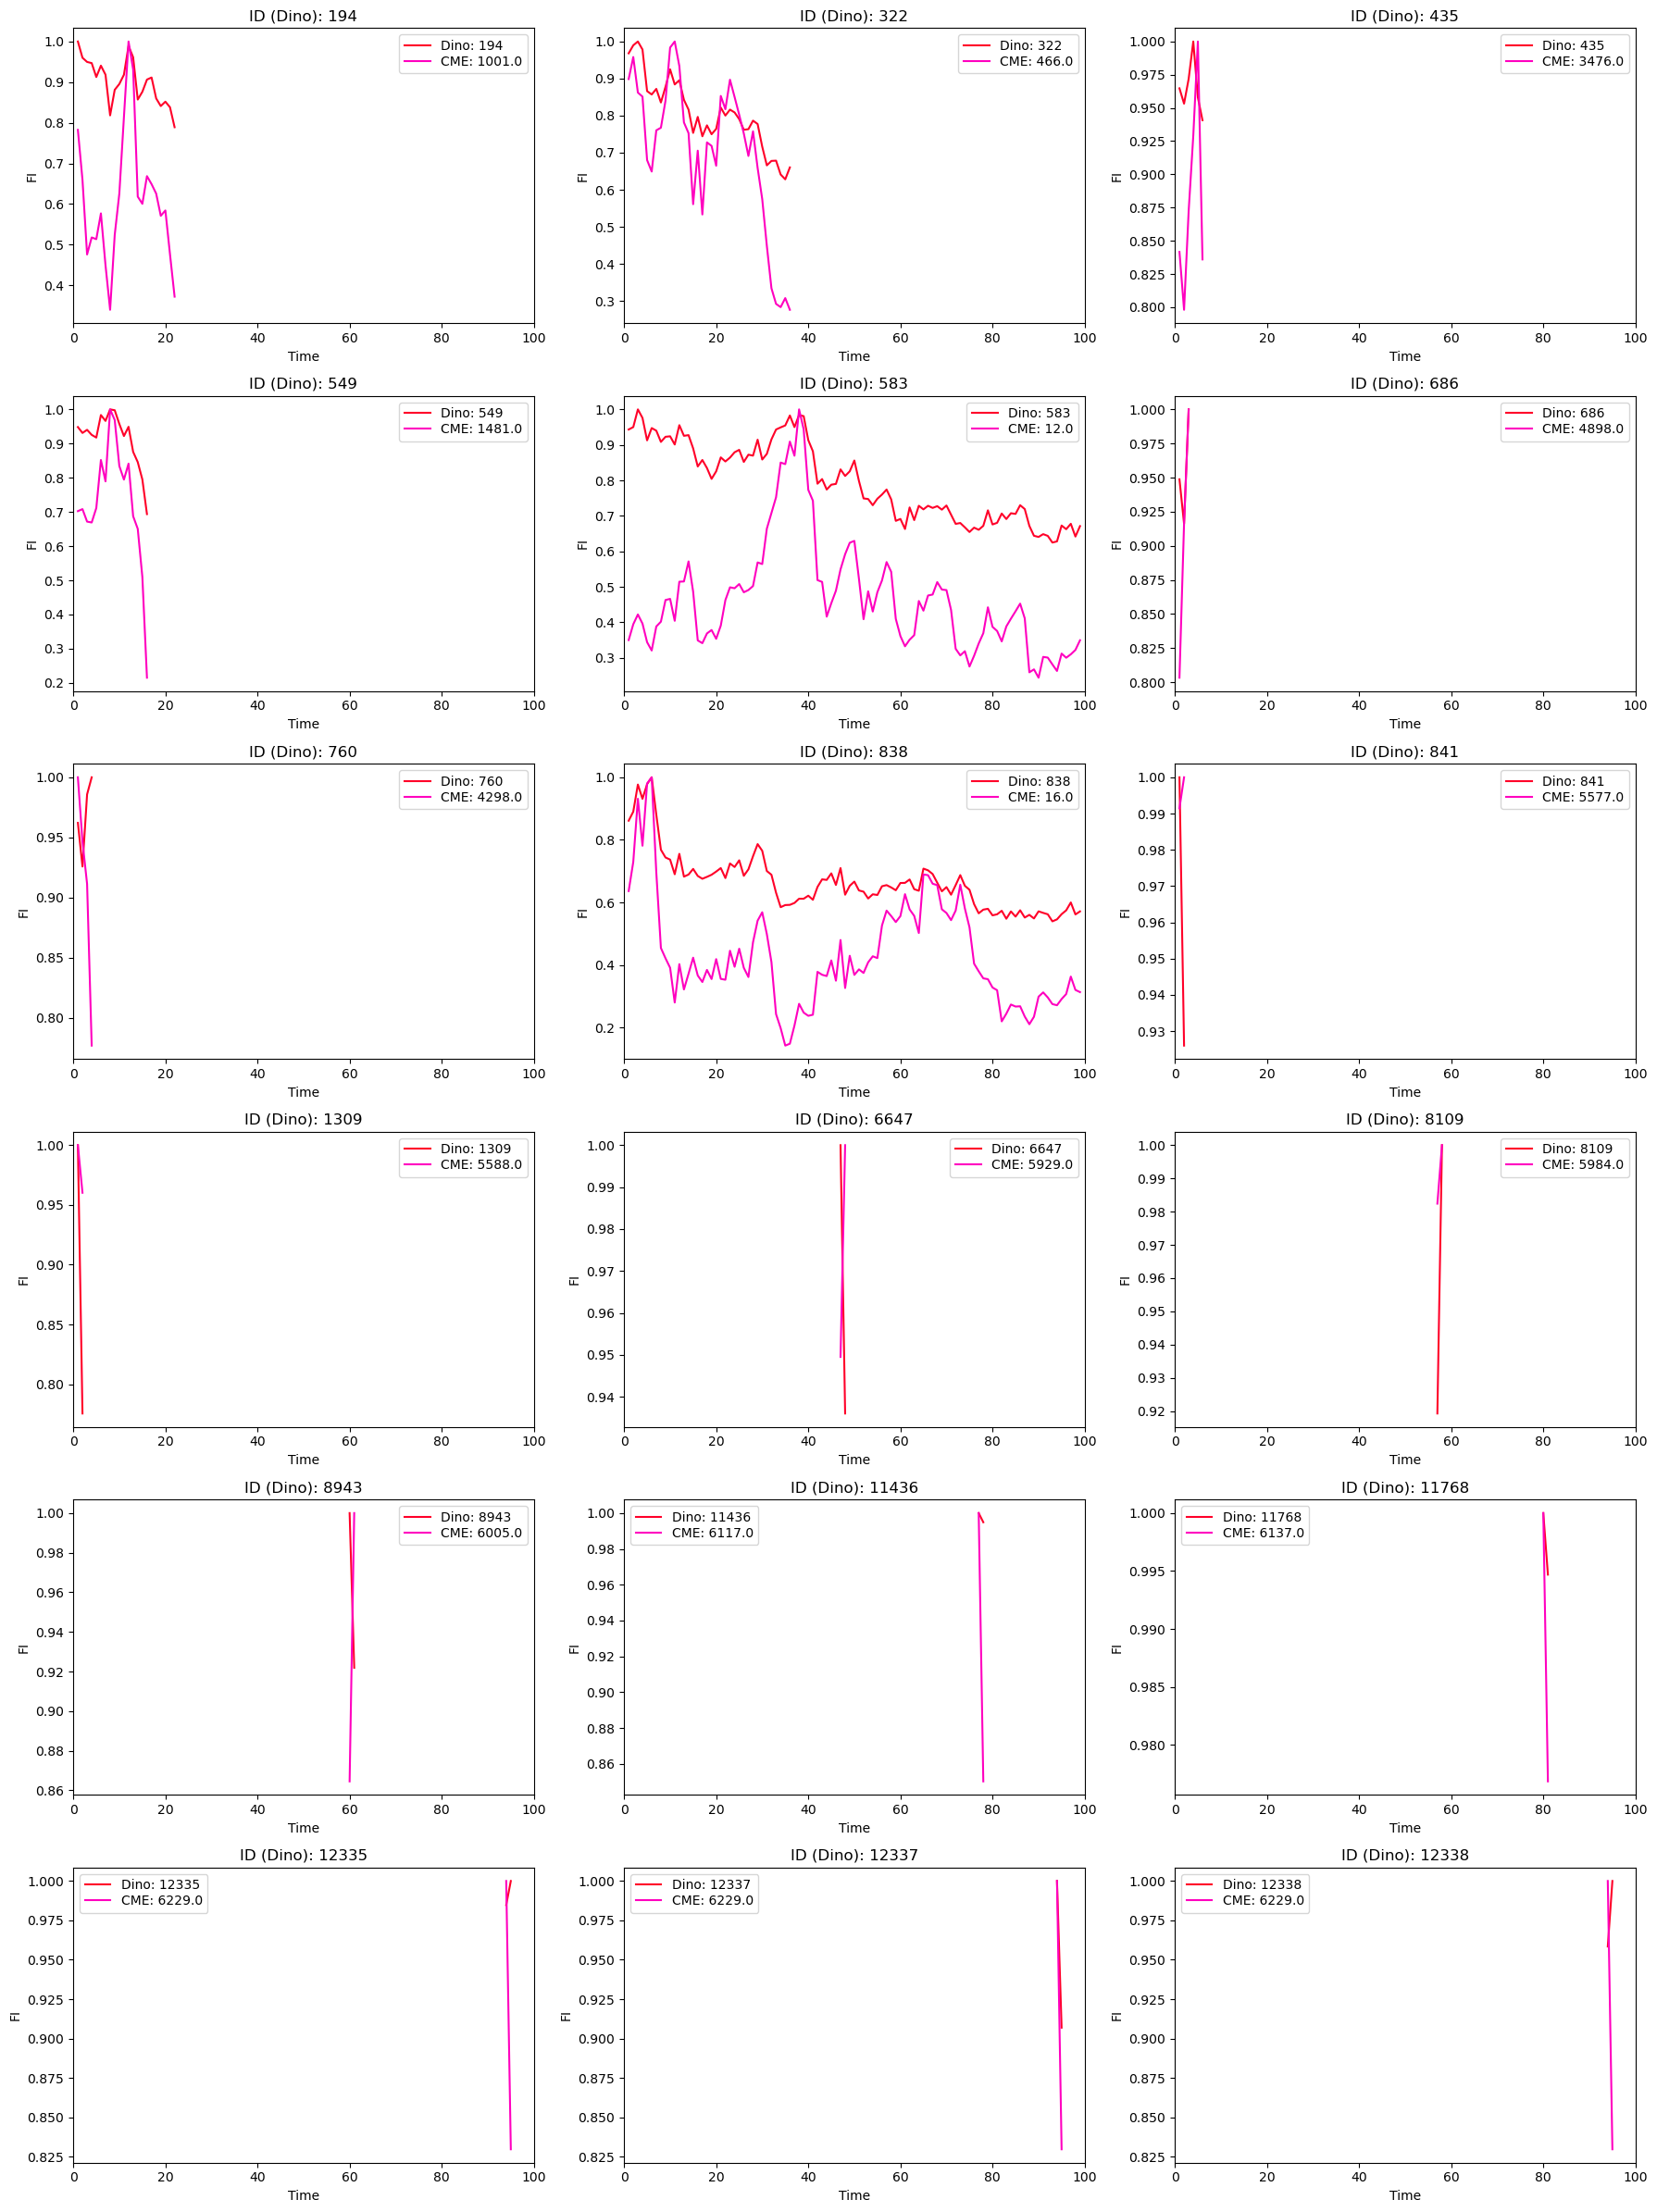

In [5]:
df_Matches = pd.read_csv(f"{base} Base Output/Matches.csv")
Match = df_Matches[df_Matches["Identical Match"]==True]

Match = Match.copy()
Match[f"Track Length ({base})"] = Match[f"Track Length ({base})"].str.extract(r"([-+]?\d*\.\d+|\d+)", expand=False).astype(float)
Match = Match[Match[f"Track Length ({base})"] > 0]

True_ID = np.array(Match[f"ID ({base})"])
True_ID = np.array([int(float(s.strip("[]"))) for s in True_ID])
FI_plot(True_ID)